In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Q1. What is Simple Linear Regression?

<!-- Ans: Simple Linear Regression is a statistical method used to predict the relationship between two variables: one independent variable (X) and one dependent variable (Y).
It finds the "best-fit" straight line through your data points, allowing you to estimate how much Y changes when X changes. 

equation:
 y = β0​ + β1​x -->

-->

# Q2 What are the key assumptions of Simple Linear Regression?

In [ ]:
# To trust the results of a Simple Linear Regression model, the data must satisfy four core assumptions. These are often remembered by the acronym LINE.

# 1. Linearity

# The relationship between the independent variable (X) and the dependent variable (Y) must be linear. This means that a straight line is actually the best way to represent the data.


# 2. Independence

# The observations (data points) must be independent of each other. This means the value of one observation should not influence or predict the value of another.


# 3. Normality of Residuals

# The errors (residuals)—the distances between the actual points and the regression line—should be normally distributed. This is important for the validity of p-values and confidence intervals.


# 4. Equal Variance (Homoscedasticity)

# The "spread" or variance of the residuals should be constant across all levels of X.

#     The Violation: If the errors get larger as X increases (creating a "fan" or "cone" shape), this is called Heteroscedasticity. This makes your model's predictions less reliable at higher values.




# Q3. What is heteroscedasticity, and why is it important to address in regression models?

In [ ]:
# Heteroscedasticity occurs in a regression model when the variance of the error terms (residuals) is not constant across all levels of the independent variable(s).

# It is important to address because it:

# Makes standard errors unreliable

# Leads to incorrect t-tests, p-values, and confidence intervals

# Reduces the efficiency of OLS estimates

# Causes misleading conclusions about variable significance

 # Q4. What is Multiple Linear Regression?

In [ ]:
# Multiple Linear Regression (MLR) is a statistical technique that uses two or more independent variables to predict the outcome of a single dependent variable
# y = β0 ​+ β1​x1 ​+ β2​x2 ​+...+ βn​xn​

# 2. A Real-World Example

# you are trying to predict the Sale Price of a House.

#     Simple Linear Regression might only look at Square Footage.

#     Multiple Linear Regression looks at Square Footage (x1​) + Number of Bedrooms (x2​) + Age of the Home (x3​) + Distance to City Center (x4​).


# Q5. What is polynomial regression, and how does it differ from linear regression?

In [2]:
# Polynomial Regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial.

# n Polynomial Regression, we add powers of the independent variable (x2,x3, etc.) to create a curve:
# y = β0 ​+ β1​x +β2​x2 +⋯+βn​xn

#     Quadratic (n=2): Creates a single curve (a parabola).

#     Cubic (n=3): Can create two curves (an "S" shape).

# Q6. Implement a Python program to fit a Simple Linear Regression model to the following sample data: 

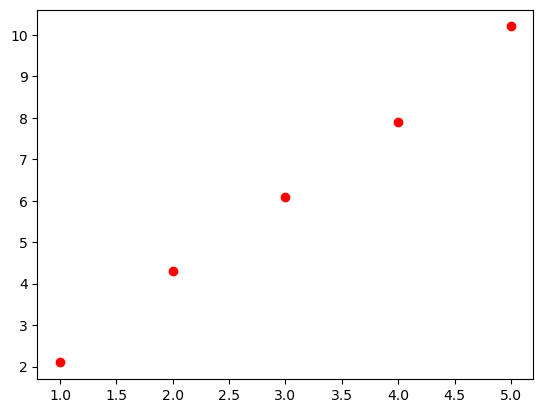

In [13]:
X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

plt.scatter(X,Y,color= "red")
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
model.fit(X,Y)

LinearRegression()

In [25]:
print("intercept:- ",model.intercept_)
print("coefficient:- ",model.coef_[0])
print("score:- ",model.score(X,Y))

intercept:-  0.17999999999999705
coefficient:-  1.9800000000000006
score:-  0.9978619425778864


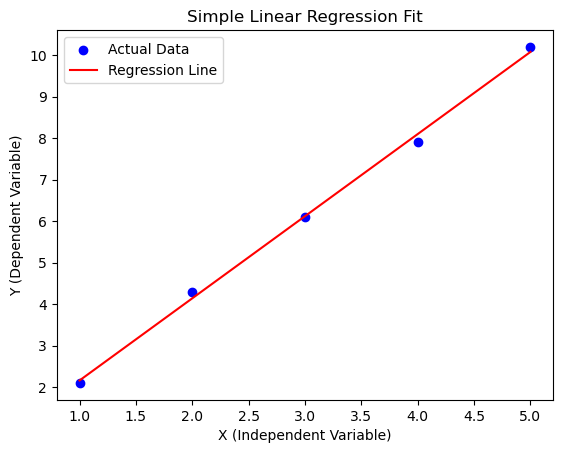

In [24]:
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.title('Simple Linear Regression Fit')
plt.legend()
plt.show()

## Q7. Question 7: Fit a Multiple Linear Regression model on this sample data: Area = [1200, 1500, 1800, 2000] Price= [250000, 300000, 320000, 370000] Rooms = [2,3,3,4] Check for multicollinearity using VIF and report the results. (Include your Python code and output in the code box below.)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

X = df[['Area','Rooms']]
y = df['Price']

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X,y)

X_with_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i+1) for i in range(len(X.columns))]

In [30]:
vif_data

,Feature,VIF
0,Area,7.736842
1,Rooms,7.736842


# Question 8: Implement polynomial regression on the following data: X = [1, 2, 3, 4, 5] Y - [2.2, 4.8, 7.5, 11.2, 14.7] Fit a 2nd-degree polynomial and plot the resulting curve. (Include your Python code and output in the code box below.)

Intercept: 0.0600
Coefficients (x, x^2): 1.94, 0.20
R-squared: 0.9993


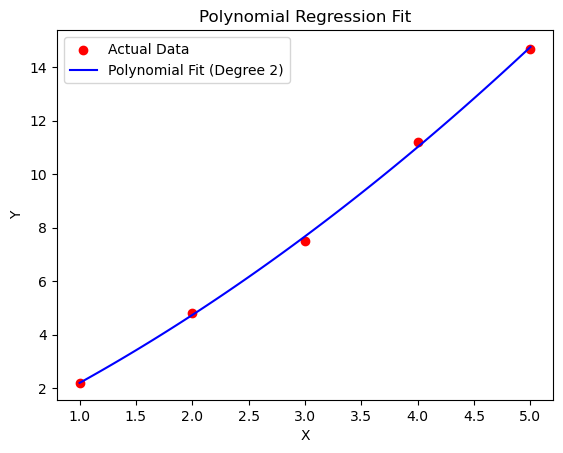

In [ ]:
X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,Y)

X_smooth = np.linspace(1,5,100).reshape(-1,1)
Y_smooth_pred = model.predict(poly.transform(X_smooth))

intercept = model.intercept_
coefficients = model.coef_
r2 = r2_score(Y, model.predict(X_poly))

print(f"Intercept: {intercept:.4f}")
print(f"Coefficients (x, x^2): {coefficients[1]:.2f}, {coefficients[2]:.2f}")
print(f"R-squared: {r2:.4f}")


plt.scatter(X,Y,color="red",label="Actual Data")
plt.plot(X_smooth,Y_smooth_pred,color="blue" ,label="Polynomial Fit (Degree 2)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()


# Question 9: Create a residuals plot for a regression model trained on this data: [10, 20, 30, 40, 50] - [15, 35, 40, 50, 65] Assess heteroscedasticity by examining the spread of residuals. (Include your Python code and output in the code box below.)

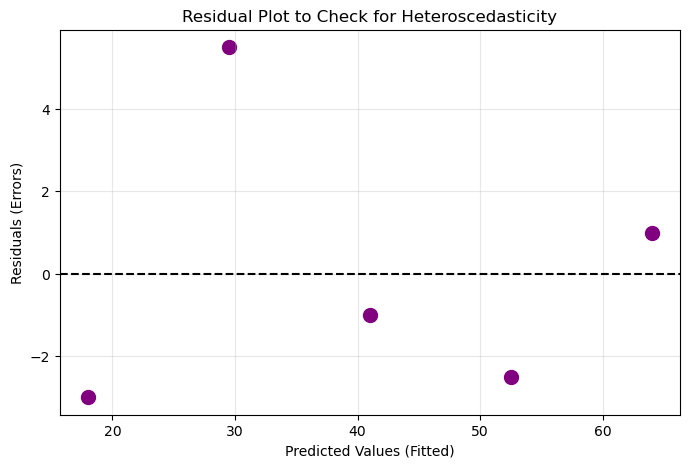

Observation 1: Actual 15.00, Predicted=18.00, Residual=-3.00
Observation 2: Actual 35.00, Predicted=29.50, Residual=5.50
Observation 3: Actual 40.00, Predicted=41.00, Residual=-1.00
Observation 4: Actual 50.00, Predicted=52.50, Residual=-2.50
Observation 5: Actual 65.00, Predicted=64.00, Residual=1.00


In [40]:
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X,Y)

predictions = model.predict(X)
residuals = Y - predictions

plt.figure(figsize=(8, 5))
plt.scatter(predictions, residuals, color='purple', s=100)
plt.axhline(y=0, color='black', linestyle='--')  # Zero error line
plt.xlabel('Predicted Values (Fitted)')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Plot to Check for Heteroscedasticity')
plt.grid(True, alpha=0.3)
plt.show()

for i,res in enumerate(residuals):
    print(f"Observation {i+1}: Actual {Y[i]:.2f}, Predicted={predictions[i]:.2f}, Residual={res:.2f}")

# Q10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

In [ ]:
# 1. Addressing Multicollinearity

# Multicollinearity in real estate is common because Area and Number of Rooms are naturally correlated. This makes the individual impact of each feature hard to isolate.

#     Step 1: Diagnostic Check (VIF): I would calculate the Variance Inflation Factor (VIF). If VIF values exceed 5 or 10, the features are too redundant.

#     Step 2: Feature Engineering: Instead of using both Area and Rooms, I could create a single feature like "Average Room Size" (Area divided by Rooms) to capture the spatial quality without the redundancy.

#     Step 3: Feature Selection: If two features provide nearly identical information, I would use Recursive Feature Elimination (RFE) or domain knowledge to drop the less significant one.

#     Step 4: Regularization: I would implement Ridge Regression. Unlike standard regression, Ridge handles correlated predictors by shrinking their coefficients, making the model much more stable and less sensitive to the noise caused by multicollinearity.

# 2. Addressing Heteroscedasticity

# In real estate, heteroscedasticity usually appears because expensive houses have much higher price variability than budget homes.

#     Step 1: Visual and Statistical Confirmation: I would plot Residuals vs. Fitted Values to look for a "fan" shape. I would also run a Breusch-Pagan test to statistically confirm the non-constant variance.

#     Step 2: Target Transformation: I would apply a Log Transformation to the house prices (log(Price)). This is a "silver bullet" for real estate data because it compresses the scale, making the variance of errors more constant across all price levels.

#     Step 3: Weighted Least Squares (WLS): If the log transformation isn't enough, I would use WLS to give more weight to observations where the variance is lower (more certain) and less weight to high-variance outliers.

#     Step 4: Robust Standard Errors: Finally, I would use Huber-White (HC) robust standard errors. This doesn't change the coefficients but ensures the p-values and confidence intervals are accurate, preventing me from reporting a feature as "significant" when it actually isn't.

# 3. Ensuring Model Robustness

# After fixing the specific issues, I would finalize the model with these validation steps:

#     Cross-Validation: Use K-Fold Cross-Validation to ensure the R2 and Error metrics (like RMSE) are consistent across different subsets of the data.

#     Residual Analysis: Re-check the Q-Q plot and Residual plot to ensure the final model's errors are normally distributed and random.

#     Evaluation: Focus on Adjusted R2 rather than standard R2 to ensure that adding features like "Location" actually adds value and isn't just increasing complexity.